In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Normal Equation : theta = inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
df = pd.read_csv(url, delim_whitespace=True, names=column_names)

In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
# Extract features and target variable
X = df[['RM']].values  # Use the RM (average number of rooms per dwelling) feature
y = df['MEDV'].values  # The target values (house prices)

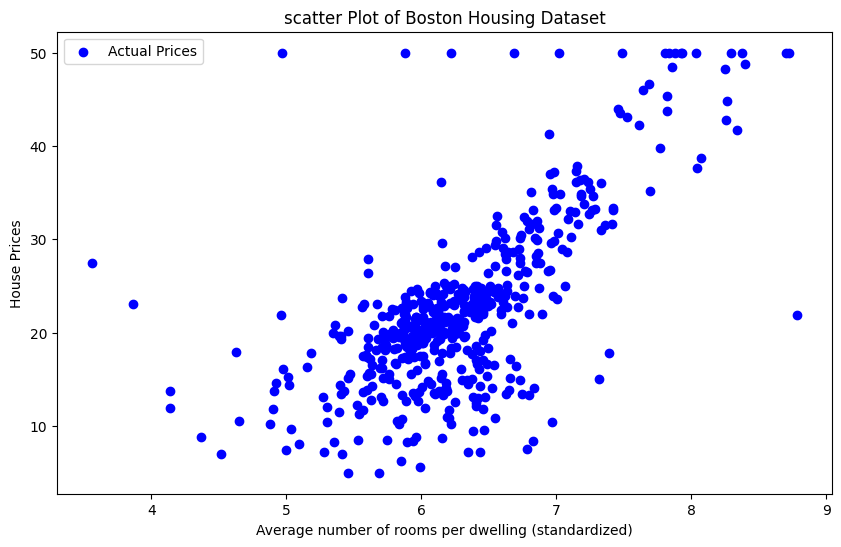

In [6]:
# Plot the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Prices')
plt.xlabel('Average number of rooms per dwelling (standardized)')
plt.ylabel('House Prices')
plt.title('scatter Plot of Boston Housing Dataset')
plt.legend()
plt.show()

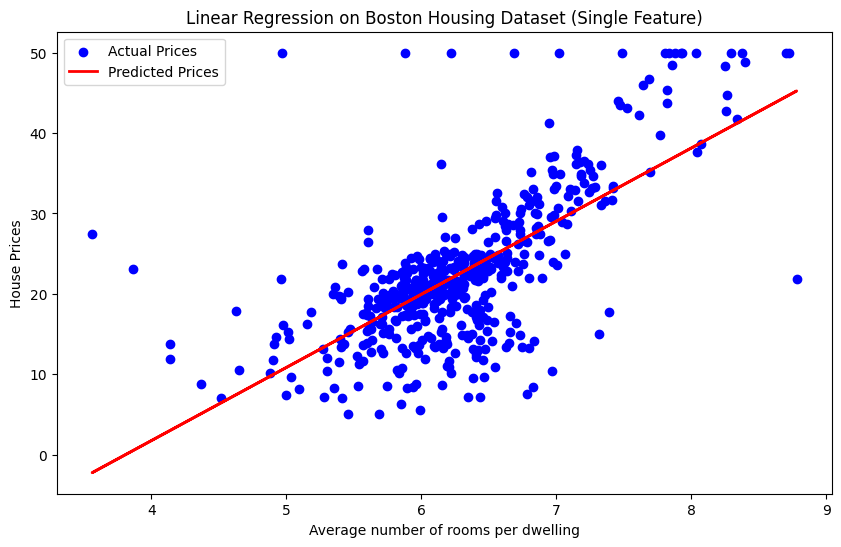

In [7]:
# Add a column of ones to X to account for the bias term (intercept)
X_b = np.column_stack([np.ones((X.shape[0], 1)), X])

# Solve for theta using the normal equation
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Make predictions
y_pred = X_b.dot(theta)

# Plot the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Prices')
plt.plot(X, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('House Prices')
plt.title('Linear Regression on Boston Housing Dataset (Single Feature)')
plt.legend()
plt.show()

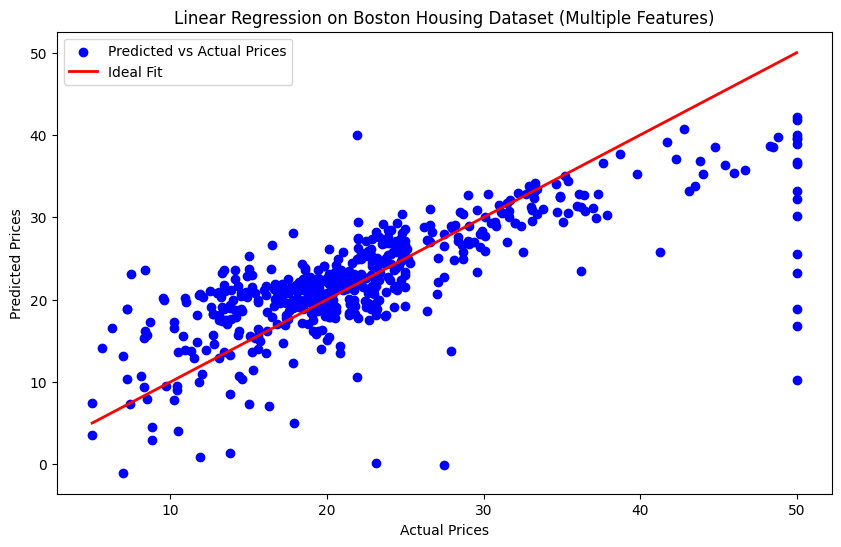

In [8]:
# Extract multiple features and target variable
features = ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE']  # Use multiple features
X = df[features].values
y = df['MEDV'].values  # The target values (house prices)

# Add a column of ones to X to account for the bias term (intercept)
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Solve for theta using the normal equation
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Make predictions
y_pred = X_b.dot(theta)

# Plot the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', label='Predicted vs Actual Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression on Boston Housing Dataset (Multiple Features)')
plt.legend()
plt.show()

In [9]:
# Load the dataset
url = 'https://raw.githubusercontent.com/vega/vega-datasets/next/data/seattle-weather.csv'
df1 = pd.read_csv(url)

In [10]:
df1

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [11]:
# Extract features and target variable
df1['DATE'] = pd.to_datetime(df1['date'])
df1['DAY_OF_YEAR'] = df1['DATE'].dt.dayofyear
# Use 'DAY_OF_YEAR' as the feature and 'TMAX' (maximum temperature) as the target variable
X = df1[['DAY_OF_YEAR']].values  # Feature: day of the year
y = df1['temp_max'].values  # Target: maximum temperature
df1 = df1.sort_values('DATE').reset_index(drop=True)

In [12]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

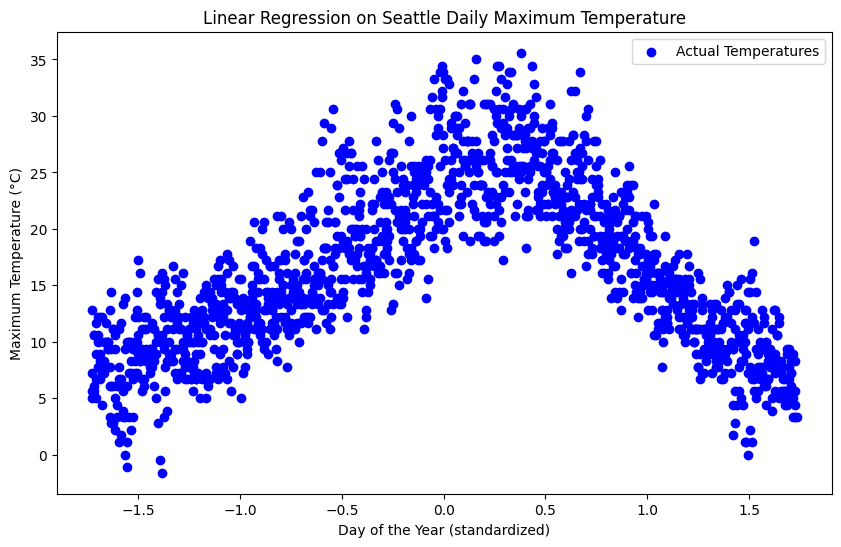

In [13]:
# Plot the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, y, color='blue', label='Actual Temperatures')
plt.xlabel('Day of the Year (standardized)')
plt.ylabel('Maximum Temperature (°C)')
plt.title('Linear Regression on Seattle Daily Maximum Temperature')
plt.legend()
plt.show()

# Singular Matrix issue: Adding constant term to resolve non-invertibilty issue

In [14]:
# Experiment with different polynomial degrees
degrees = [2, 3, 4, 5]

for degree in degrees:
    print(f"\nPolynomial Degree: {degree}")
    
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_poly)

    # Add a column of ones to X to account for the bias term (intercept)
    X_b = np.column_stack([np.ones((X_scaled.shape[0], 1)), X_scaled])

    # Solve for theta using the normal equation
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    # Make predictions
    y_pred = X_b.dot(theta)
    
    # Sort the values by the feature before plotting
    sorted_indices = np.argsort(X[:, 0])
    X_sorted = X[sorted_indices]
    y_pred_sorted = y_pred[sorted_indices]

    # Plot the data and regression curve
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Temperatures')
    plt.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, label='Predicted Temperatures')
    plt.xlabel('Day of the Year')
    plt.ylabel('Maximum Temperature (°C)')
    plt.title(f'Polynomial Regression (Degree {degree}) on Seattle Daily Maximum Temperature')
    plt.legend()
    plt.show()

    # Scatter plot of predicted vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, color='blue', alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel('Actual Temperatures')
    plt.ylabel('Predicted Temperatures')
    plt.title(f'Predicted vs Actual Temperatures (Degree {degree})')
    plt.show()

    # Calculate and print performance metrics
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}")


Polynomial Degree: 2


LinAlgError: Singular matrix


Polynomial Degree: 2


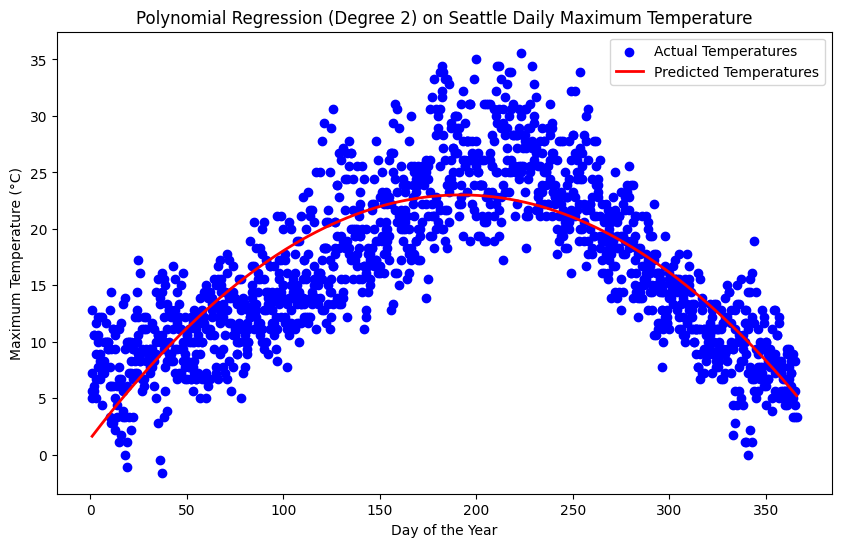

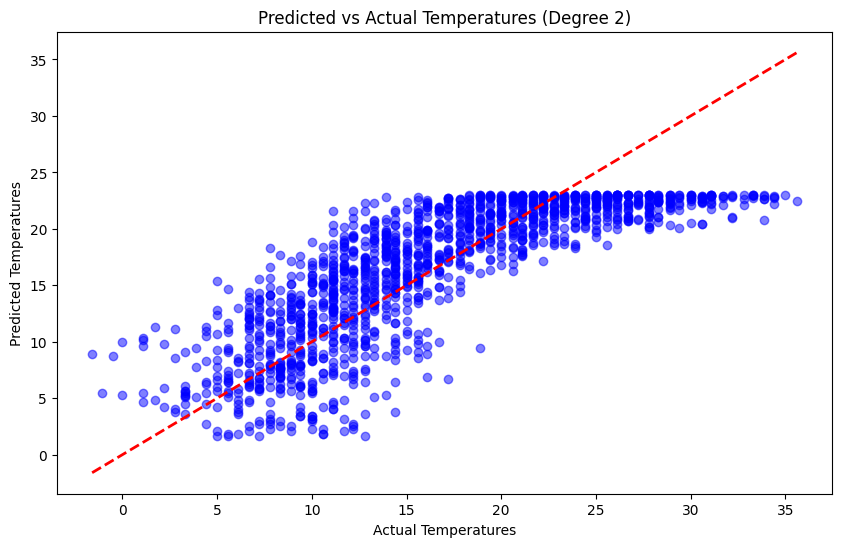

Mean Squared Error (MSE): 18.778716581245867
R-squared (R2): 0.6521298401412178

Polynomial Degree: 3


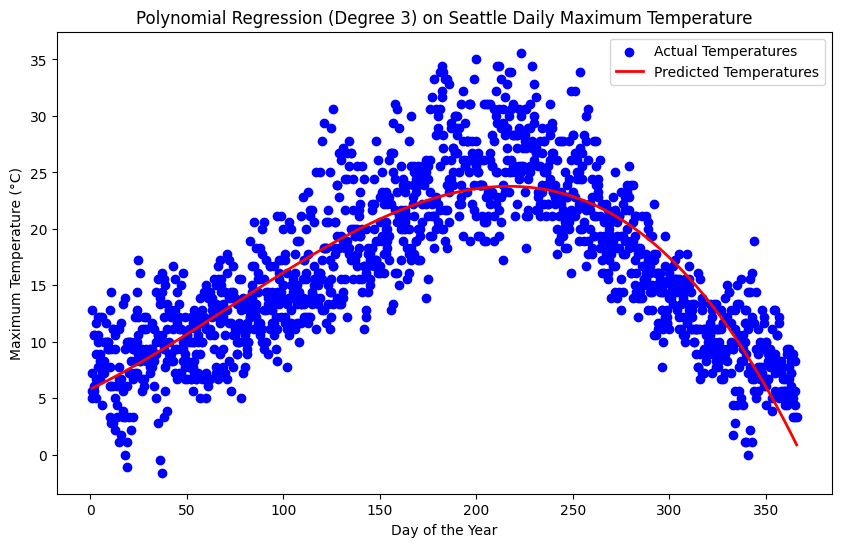

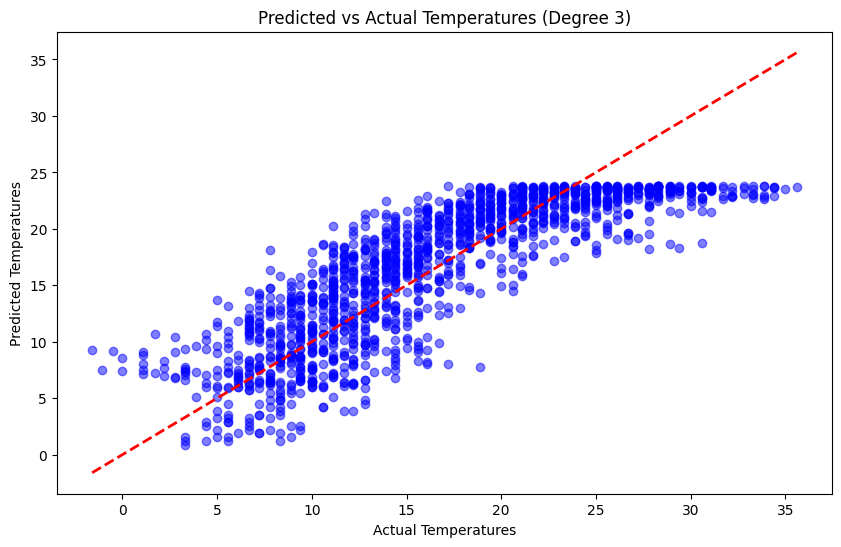

Mean Squared Error (MSE): 16.11380890398285
R-squared (R2): 0.7014964651545699

Polynomial Degree: 4


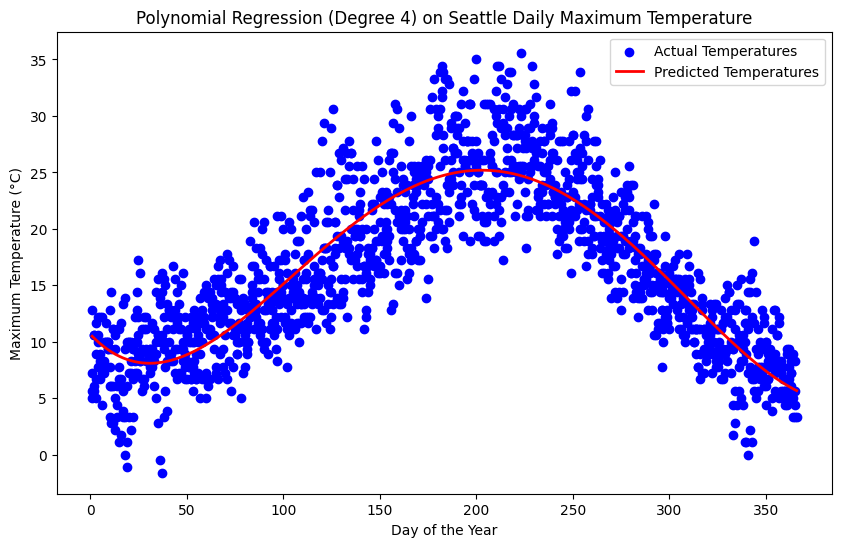

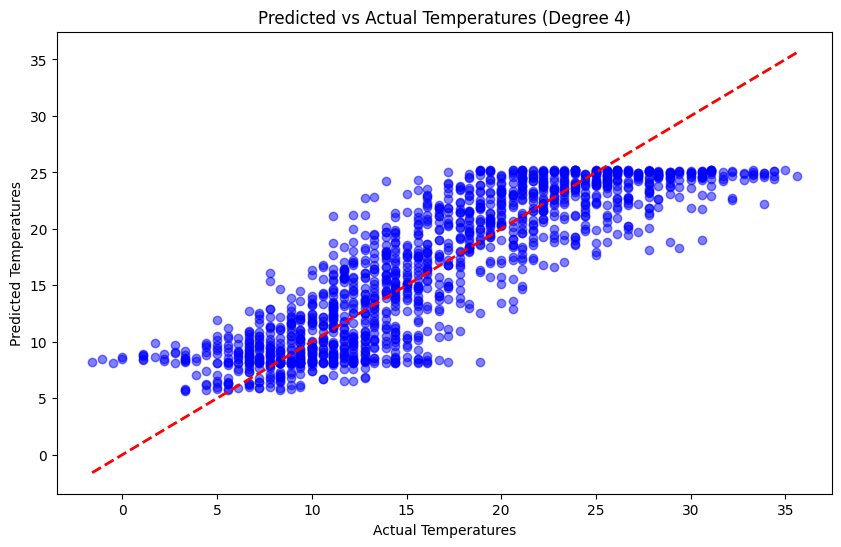

Mean Squared Error (MSE): 13.617983453892252
R-squared (R2): 0.7477308920146951

Polynomial Degree: 5


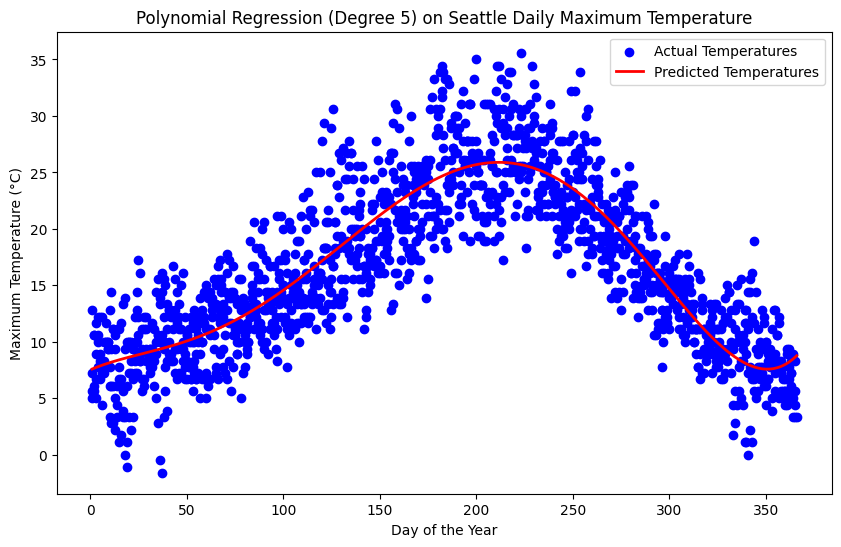

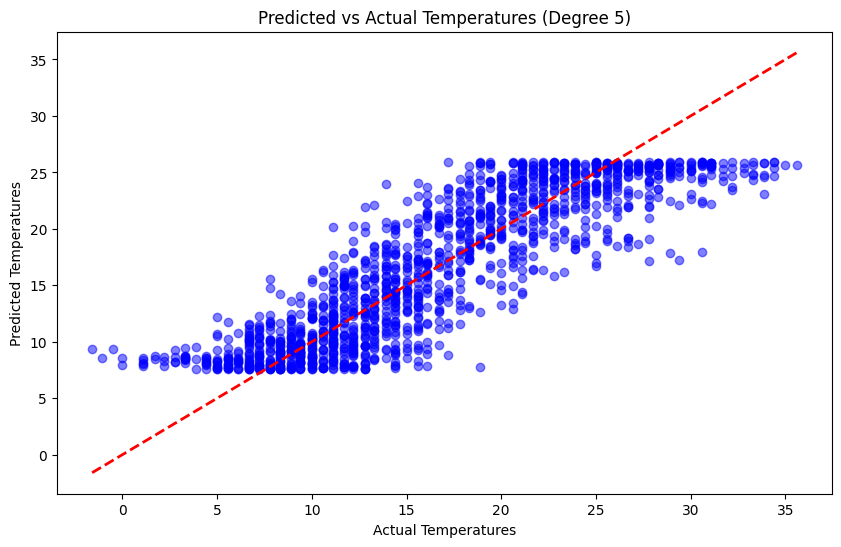

Mean Squared Error (MSE): 12.778671663838768
R-squared (R2): 0.7632788942071802


In [15]:
# Experiment with different polynomial degrees
degrees = [2, 3, 4, 5]

for degree in degrees:
    print(f"\nPolynomial Degree: {degree}")
    
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_poly)

    # Add a column of ones to X to account for the bias term (intercept)
    X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

    # Add lambda term
    lambda_ = 1e-5
    I = np.eye(X_b.shape[1])
    I[0, 0] = 0  # Do not change intercept term

    # Solve for theta using the regularized normal equation
    theta = np.linalg.inv(X_b.T.dot(X_b) + lambda_ * I).dot(X_b.T).dot(y)  # Here small constant has been added (Not to intercept term)

    # Make predictions
    y_pred = X_b.dot(theta)
    
    # Sort the values by the feature before plotting
    sorted_indices = np.argsort(X[:, 0])
    X_sorted = X[sorted_indices]
    y_pred_sorted = y_pred[sorted_indices]

    # Plot the data and regression curve
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Temperatures')
    plt.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, label='Predicted Temperatures')
    plt.xlabel('Day of the Year')
    plt.ylabel('Maximum Temperature (°C)')
    plt.title(f'Polynomial Regression (Degree {degree}) on Seattle Daily Maximum Temperature')
    plt.legend()
    plt.show()

    # Scatter plot of predicted vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, color='blue', alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel('Actual Temperatures')
    plt.ylabel('Predicted Temperatures')
    plt.title(f'Predicted vs Actual Temperatures (Degree {degree})')
    plt.show()

    # Calculate and print performance metrics
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}")

Degree 2 - Train Loss: 19.0308, Test Loss: 21.9539
Degree 3 - Train Loss: 16.4414, Test Loss: 20.3787
Degree 4 - Train Loss: 21.3945, Test Loss: 28.4566
Degree 6 - Train Loss: 16.3704, Test Loss: 21.9932


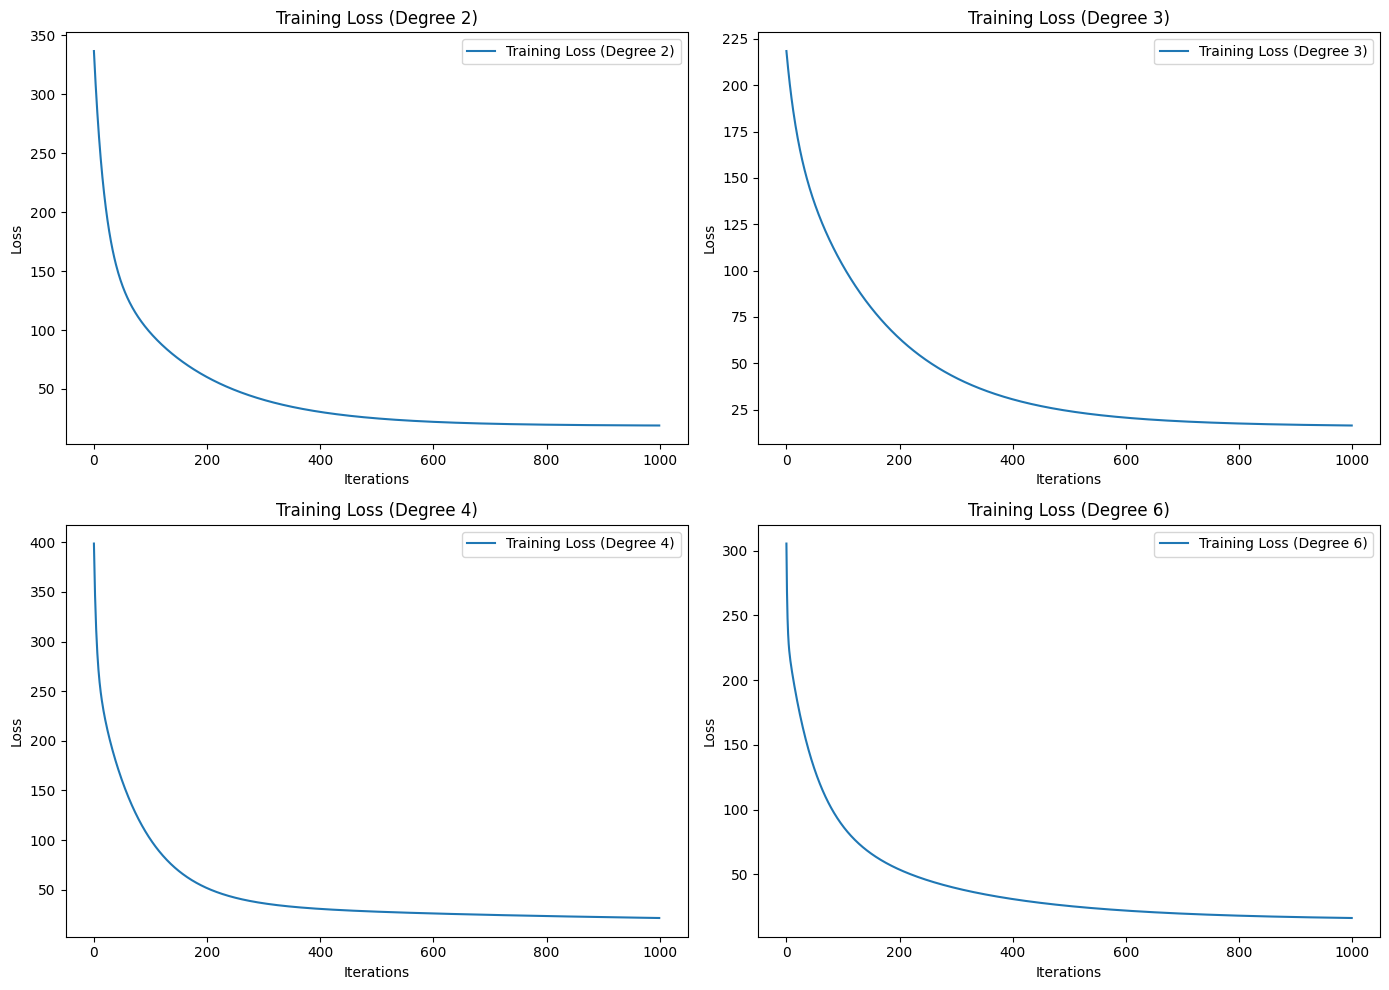

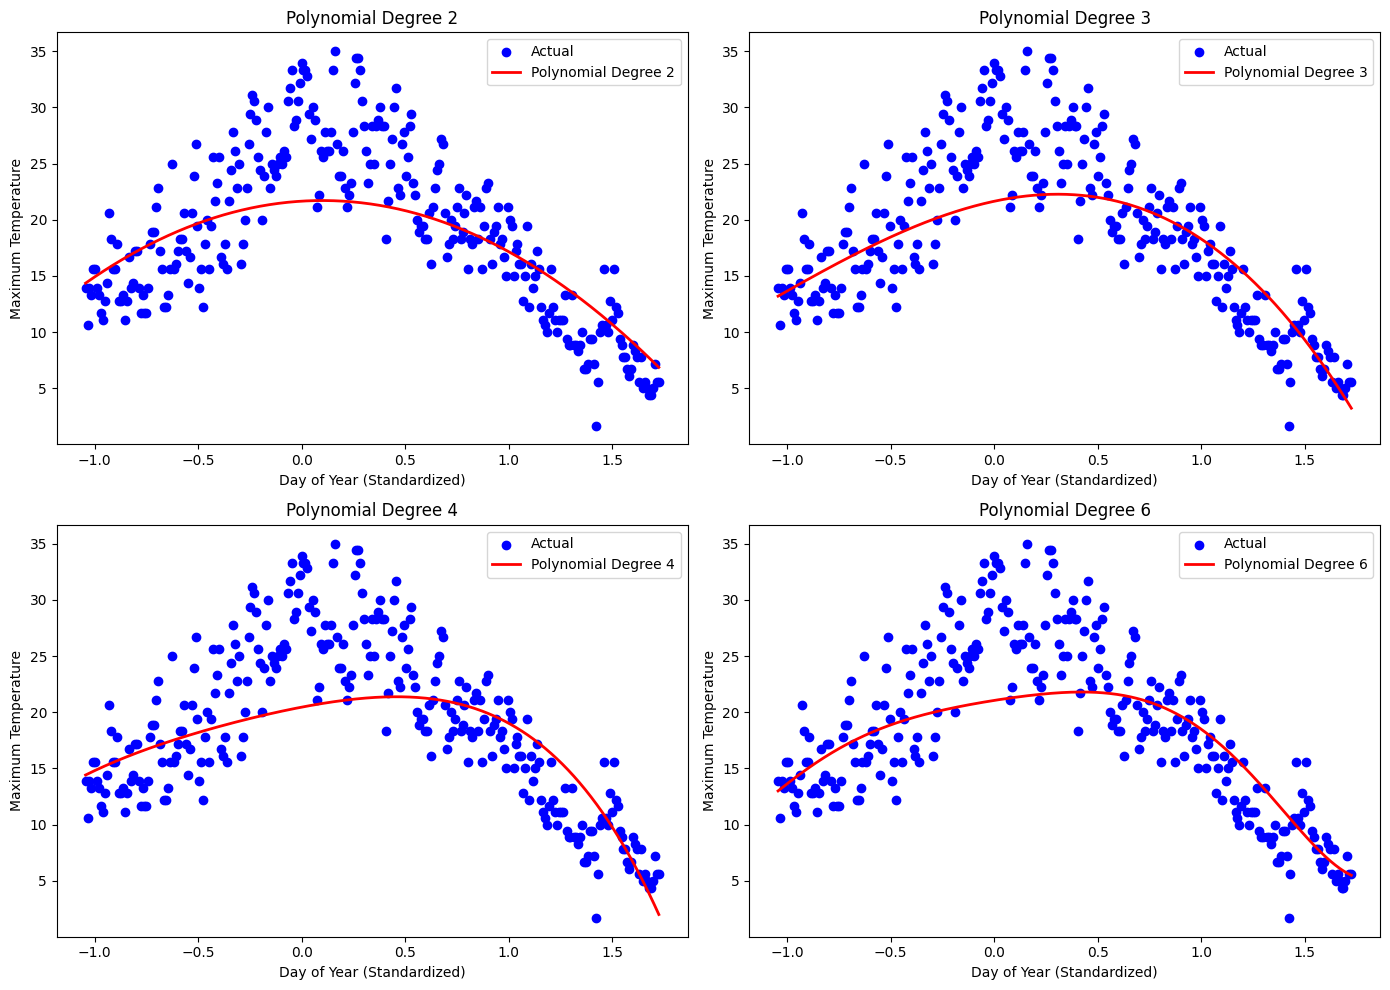

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = 'https://raw.githubusercontent.com/vega/vega-datasets/next/data/seattle-weather.csv'
df1 = pd.read_csv(url)

# Extract features and target variable
df1['DATE'] = pd.to_datetime(df1['date'])
df1['DAY_OF_YEAR'] = df1['DATE'].dt.dayofyear

# Use 'DAY_OF_YEAR' as the feature and 'temp_max' (maximum temperature) as the target variable
X = df1[['DAY_OF_YEAR']].values  # Feature: day of the year
y = df1['temp_max'].values  # Target: maximum temperature

# Sort the data by date
df1 = df1.sort_values('DATE').reset_index(drop=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Manual split: 80% training, 20% test
train_size = int(0.8 * len(X_scaled))
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create polynomial features manually
def create_polynomial_features(X, degree):
    X_poly = np.ones((X.shape[0], 1))  # Start with a column of ones for the intercept term
    for d in range(1, degree + 1):
        X_poly = np.hstack((X_poly, X ** d))
    return X_poly

# Initialize function for training and evaluation
def train_and_evaluate(X_train, y_train, X_test, y_test, degree):
    X_train_poly = create_polynomial_features(X_train, degree)
    X_test_poly = create_polynomial_features(X_test, degree)

    # Initialize parameters
    theta = np.random.randn(X_train_poly.shape[1])  # Random initialization
    learning_rate = 0.01  # Adjust learning rate to avoid overflow
    n_iterations = 1000
    m = len(X_train_poly)
    loss_history_train = []

    # Gradient descent
    for iteration in range(n_iterations):
        gradients = 1/m * X_train_poly.T.dot(X_train_poly.dot(theta) - y_train)
        theta = theta - learning_rate * gradients
        loss_train = (1/m) * np.sum((X_train_poly.dot(theta) - y_train)**2)
        loss_history_train.append(loss_train)
        if np.isnan(loss_train) or np.isinf(loss_train):
            break

    # Make predictions
    y_train_pred = X_train_poly.dot(theta)
    y_test_pred = X_test_poly.dot(theta)

    # Evaluate the model on the training and test sets
    train_loss = (1/len(X_train_poly)) * np.sum((X_train_poly.dot(theta) - y_train)**2)
    test_loss = (1/len(X_test_poly)) * np.sum((X_test_poly.dot(theta) - y_test)**2)
    
    return y_train_pred, y_test_pred, loss_history_train, train_loss, test_loss, theta

# Degree of the polynomial
degrees = [2, 3, 4, 6]

# Plot training loss and evaluation results
plt.figure(figsize=(14, 10))

for degree in degrees:
    y_train_pred, y_test_pred, loss_history_train, train_loss, test_loss, theta = train_and_evaluate(X_train, y_train, X_test, y_test, degree)
    
    # Plot training loss
    plt.subplot(2, 2, degrees.index(degree) + 1)
    plt.plot(loss_history_train, label=f'Training Loss (Degree {degree})')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'Training Loss (Degree {degree})')
    plt.legend()

    # Print train and test losses
    print(f"Degree {degree} - Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

plt.tight_layout()
plt.show()

# Plot actual vs predicted values for test set for each degree
plt.figure(figsize=(14, 10))

for degree in degrees:
    _, y_test_pred, _, _, _, theta = train_and_evaluate(X_train, y_train, X_test, y_test, degree)
    
    # Generate polynomial features for the plot
    X_plot = np.linspace(X_test.min(), X_test.max(), 500).reshape(-1, 1)
    X_plot_poly = create_polynomial_features(X_plot, degree)
    y_plot = X_plot_poly.dot(theta)
    
    plt.subplot(2, 2, degrees.index(degree) + 1)
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_plot, y_plot, color='red', linewidth=2, label=f'Polynomial Degree {degree}')
    plt.xlabel('Day of Year (Standardized)')
    plt.ylabel('Maximum Temperature')
    plt.title(f'Polynomial Degree {degree}')
    plt.legend()

plt.tight_layout()
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(scale=0.3, size=X.shape).ravel()

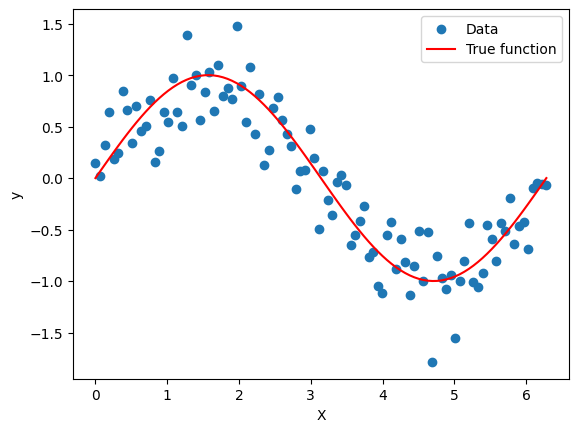

In [28]:
# Plot the data
plt.scatter(X, y, label='Data')
plt.plot(X, np.sin(X).ravel(), color='red', label='True function')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [21]:
# Split the data into training and test sets, using inbuilt command
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

In [29]:
# Create polynomial features and fit models of different degrees
degrees = [2, 4, 10]
models = []
train_errors = []
test_errors = []

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    models.append((model, poly))
    
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

    print(f"Degree {degree} - Train Loss: {mean_squared_error(y_train, y_train_pred):.4f}, Test Loss: {mean_squared_error(y_test, y_test_pred):.4f}")

Degree 2 - Train Loss: 0.2216, Test Loss: 0.2456
Degree 4 - Train Loss: 0.0783, Test Loss: 0.0576
Degree 10 - Train Loss: 0.0674, Test Loss: 0.0736


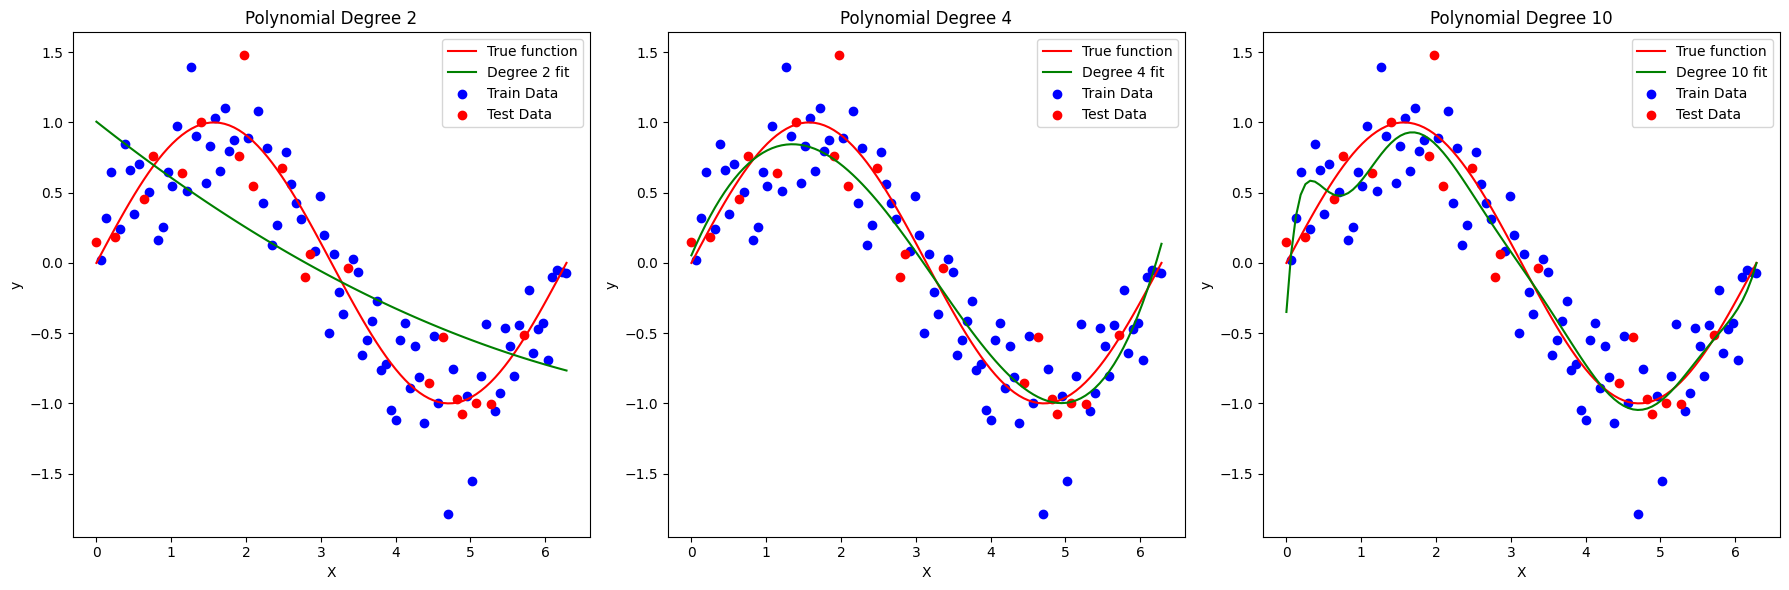

In [30]:
# Plot the results
plt.figure(figsize=(18, 6))

for i, (model, poly) in enumerate(models):
    degree = degrees[i]
    X_poly = poly.transform(X_scaled)
    y_plot = model.predict(X_poly)
    
    plt.subplot(1, 3, i + 1)
    plt.plot(X, np.sin(X), color='red', label='True function')
    plt.plot(X, y_plot, color='green', label=f'Degree {degree} fit')
    plt.scatter(scaler.inverse_transform(X_train_scaled), y_train, color='blue', alpha=1, label='Train Data')
    plt.scatter(scaler.inverse_transform(X_test_scaled), y_test, color='red', alpha=1, label='Test Data')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Polynomial Degree {degree}')
    plt.legend()

plt.tight_layout()
plt.show()